In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
import pandas as pd
import seaborn as sns


In [3]:
Df = pd.read_excel('CreditRisk_Data.xls')
Df.head(5)

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,...,67.0,0,0,1,2,2,1,1,0,1
1,2,1,48,2,0,0,0,1,0,0,...,22.0,0,0,1,1,2,1,0,0,0
2,3,3,12,4,0,0,0,0,1,0,...,49.0,0,0,1,1,1,2,0,0,1
3,4,0,42,2,0,0,1,0,0,0,...,45.0,0,0,0,1,2,2,0,0,1
4,5,0,24,3,1,0,0,0,0,0,...,53.0,0,0,0,2,2,2,0,0,0


<Axes: >

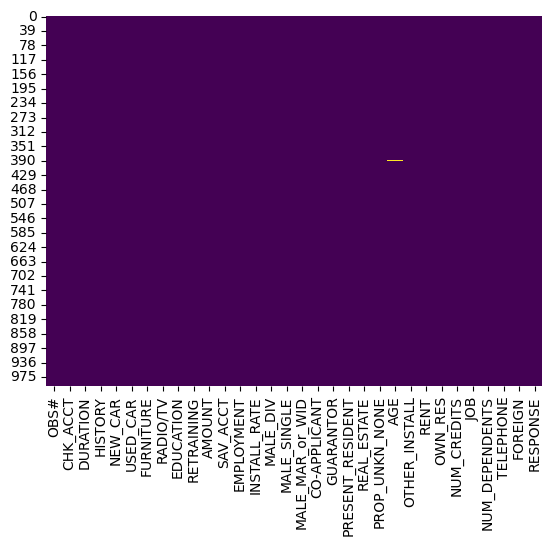

In [4]:
sns.heatmap(Df.isnull(), cbar=False, cmap="viridis")

In [5]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OBS#              1000 non-null   int64  
 1   CHK_ACCT          1000 non-null   int64  
 2   DURATION          1000 non-null   int64  
 3   HISTORY           1000 non-null   int64  
 4   NEW_CAR           1000 non-null   int64  
 5   USED_CAR          1000 non-null   int64  
 6   FURNITURE         1000 non-null   int64  
 7   RADIO/TV          1000 non-null   int64  
 8   EDUCATION         1000 non-null   int64  
 9   RETRAINING        1000 non-null   int64  
 10  AMOUNT            1000 non-null   int64  
 11  SAV_ACCT          1000 non-null   int64  
 12  EMPLOYMENT        1000 non-null   int64  
 13  INSTALL_RATE      1000 non-null   int64  
 14  MALE_DIV          999 non-null    float64
 15  MALE_SINGLE       1000 non-null   int64  
 16  MALE_MAR_or_WID   1000 non-null   int64  
 

In [6]:
# Data cleaning
# removing NA values

Df_cleaned = Df.dropna()
Df_cleaned = Df_cleaned.reset_index(drop=True)
Df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OBS#              997 non-null    int64  
 1   CHK_ACCT          997 non-null    int64  
 2   DURATION          997 non-null    int64  
 3   HISTORY           997 non-null    int64  
 4   NEW_CAR           997 non-null    int64  
 5   USED_CAR          997 non-null    int64  
 6   FURNITURE         997 non-null    int64  
 7   RADIO/TV          997 non-null    int64  
 8   EDUCATION         997 non-null    int64  
 9   RETRAINING        997 non-null    int64  
 10  AMOUNT            997 non-null    int64  
 11  SAV_ACCT          997 non-null    int64  
 12  EMPLOYMENT        997 non-null    int64  
 13  INSTALL_RATE      997 non-null    int64  
 14  MALE_DIV          997 non-null    float64
 15  MALE_SINGLE       997 non-null    int64  
 16  MALE_MAR_or_WID   997 non-null    int64  
 1

### Implement Normalisation

In [7]:
X_df = Df_cleaned.iloc[:,0:31]
Y_df = Df_cleaned.iloc[:,31]
Y_df.head(5)

0    1
1    0
2    1
3    1
4    0
Name: RESPONSE, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.2, random_state= 15)
y_test.head(5)

823    0
774    1
933    0
722    1
42     1
Name: RESPONSE, dtype: int64

## Models

### Logistic Regression

In [9]:
# Logistic Regression
# Training Model
# default

LogReg = LogisticRegression(max_iter=1000)
LogReg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [10]:
# Testing and Metrics   
y_test_pred = LogReg.predict(X_test)
y_train_pred = LogReg.predict(X_train)

# Metrics
AP_test = metrics.average_precision_score(y_test,y_test_pred)
AP_train = metrics.average_precision_score(y_train,y_train_pred)

F1_test = metrics.f1_score(y_test,y_test_pred)
F1_train = metrics.f1_score(y_train,y_train_pred)

recall_test = metrics.recall_score(y_test,y_test_pred)
recall_train = metrics.recall_score(y_train,y_train_pred)

AUC_test = metrics.roc_auc_score(y_test,y_test_pred)
AUC_train = metrics.roc_auc_score(y_train,y_train_pred)

metrics_dict = {
    '': ['train', 'test'],
    'AP': [AP_train, AP_test],
    'F1': [F1_train, F1_test],
    'Recall': [recall_train, recall_test],
    'AUC': [AUC_train, AUC_test]
}

metrics_df = pd.DataFrame(data=metrics_dict)
metrics_df

,,AP,F1,Recall,AUC
0,train,0.802573,0.849829,0.887701,0.704443
1,test,0.765092,0.828767,0.889706,0.671415


### Ridge Classifier

In [11]:
# Ridge Classifier

RidgeCl = RidgeClassifier()
RidgeCl.fit(X_train, y_train)

RidgeClassifier()

In [12]:
# Testing and Metrics   
y_test_pred = RidgeCl.predict(X_test)
y_train_pred = RidgeCl.predict(X_train)

# Metrics
AP_test = metrics.average_precision_score(y_test,y_test_pred)
AP_train = metrics.average_precision_score(y_train,y_train_pred)

F1_test = metrics.f1_score(y_test,y_test_pred)
F1_train = metrics.f1_score(y_train,y_train_pred)

recall_test = metrics.recall_score(y_test,y_test_pred)
recall_train = metrics.recall_score(y_train,y_train_pred)

AUC_test = metrics.roc_auc_score(y_test,y_test_pred)
AUC_train = metrics.roc_auc_score(y_train,y_train_pred)

metrics_dict = {
    '': ['train', 'test'],
    'AP': [AP_train, AP_test],
    'F1': [F1_train, F1_test],
    'Recall': [recall_train, recall_test],
    'AUC': [AUC_train, AUC_test]
}

metrics_df = pd.DataFrame(data=metrics_dict)
metrics_df

,,AP,F1,Recall,AUC
0,train,0.805632,0.854468,0.894831,0.710127
1,test,0.758309,0.827119,0.897059,0.659467


### LinearSVC

In [13]:
# LinearSVC

Linear_SVC = LinearSVC(max_iter= 5000000)
Linear_SVC.fit(X_train, y_train)

# try "hinge" as new loss
#

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=5000000)

#### Grid search for hyperparameter tunning
Also implements a 5-fold Crossvalidation

In [23]:
# Implementing Grid search to tune hyper parameters
# increase max_iter
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.5, 1, 2, 4, 6, 8, 10],
    'loss': ['squared_hinge', 'hinge']
}

Grid_search = GridSearchCV(LinearSVC(max_iter= 500000), param_grid=param_grid)
Grid_search.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

GridSearchCV(estimator=LinearSVC(max_iter=500000),
             param_grid={'C': [0.5, 1, 2, 4, 6, 8, 10],
                         'loss': ['squared_hinge', 'hinge'],
                         'penalty': ['l1', 'l2']})

In [24]:
print(Grid_search.best_params_) # best parameters
pd.DataFrame(Grid_search.cv_results_)

{'C': 6, 'loss': 'squared_hinge', 'penalty': 'l2'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_loss,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005874,0.001853,0.000000,0.000000,0.5,squared_hinge,l1,"{'C': 0.5, 'loss': 'squared_hinge', 'penalty':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
1,10.184664,0.226101,0.001625,0.000511,0.5,squared_hinge,l2,"{'C': 0.5, 'loss': 'squared_hinge', 'penalty':...",0.73125,0.75000,0.710692,0.779874,0.534591,0.701281,0.086397,8
2,0.001798,0.000420,0.000000,0.000000,0.5,hinge,l1,"{'C': 0.5, 'loss': 'hinge', 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
3,18.070715,7.570113,0.002592,0.001016,0.5,hinge,l2,"{'C': 0.5, 'loss': 'hinge', 'penalty': 'l2'}",0.66875,0.78125,0.779874,0.735849,0.710692,0.735283,0.042739,4
4,0.006677,0.000405,0.000000,0.000000,1,squared_hinge,l1,"{'C': 1, 'loss': 'squared_hinge', 'penalty': '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
5,10.544991,1.263901,0.001819,0.000407,1,squared_hinge,l2,"{'C': 1, 'loss': 'squared_hinge', 'penalty': '...",0.78125,0.74375,0.710692,0.773585,0.666667,0.735189,0.042343,5
6,0.001575,0.000751,0.000000,0.000000,1,hinge,l1,"{'C': 1, 'loss': 'hinge', 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
7,10.222098,0.459883,0.001803,0.000711,1,hinge,l2,"{'C': 1, 'loss': 'hinge', 'penalty': 'l2'}",0.76875,0.76250,0.716981,0.754717,0.685535,0.737697,0.031684,3
8,0.001826,0.000363,0.000000,0.000000,2,squared_hinge,l1,"{'C': 2, 'loss': 'squared_hinge', 'penalty': '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
9,22.442998,5.696583,0.003200,0.001173,2,squared_hinge,l2,"{'C': 2, 'loss': 'squared_hinge', 'penalty': '...",0.66250,0.75625,0.377358,0.484277,0.704403,0.596958,0.142923,14


In [ ]:
# Testing and Metrics   
y_test_pred = Linear_SVC.predict(X_test)
y_train_pred = Linear_SVC.predict(X_train)

# Metrics
AP_test = metrics.average_precision_score(y_test,y_test_pred)
AP_train = metrics.average_precision_score(y_train,y_train_pred)

F1_test = metrics.f1_score(y_test,y_test_pred)
F1_train = metrics.f1_score(y_train,y_train_pred)

recall_test = metrics.recall_score(y_test,y_test_pred)
recall_train = metrics.recall_score(y_train,y_train_pred)

AUC_test = metrics.roc_auc_score(y_test,y_test_pred)
AUC_train = metrics.roc_auc_score(y_train,y_train_pred)

metrics_dict = {
    '': ['train', 'test'],
    'AP': [AP_train, AP_test],
    'F1': [F1_train, F1_test],
    'Recall': [recall_train, recall_test],
    'AUC': [AUC_train, AUC_test]
}

metrics_df = pd.DataFrame(data=metrics_dict)
metrics_df

,,AP,F1,Recall,AUC
0,train,0.818171,0.706392,0.581105,0.714281
1,test,0.765907,0.678261,0.573529,0.661765


### K Neighbors Classifier

In [ ]:
# K Neighbors Classifier
# hyper parameters to be changed
# change algo used
# change leaf_size
# change weight 
# change n_neigbours 

KNCls = KNeighborsClassifier()
KNCls.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Testing and Metrics   
y_test_pred = KNCls.predict(X_test)
y_train_pred = KNCls.predict(X_train)

# Metrics
AP_test = metrics.average_precision_score(y_test,y_test_pred)
AP_train = metrics.average_precision_score(y_train,y_train_pred)

F1_test = metrics.f1_score(y_test,y_test_pred)
F1_train = metrics.f1_score(y_train,y_train_pred)

recall_test = metrics.recall_score(y_test,y_test_pred)
recall_train = metrics.recall_score(y_train,y_train_pred)

AUC_test = metrics.roc_auc_score(y_test,y_test_pred)
AUC_train = metrics.roc_auc_score(y_train,y_train_pred)

metrics_dict = {
    '': ['train', 'test'],
    'AP': [AP_train, AP_test],
    'F1': [F1_train, F1_test],
    'Recall': [recall_train, recall_test],
    'AUC': [AUC_train, AUC_test]
}

metrics_df = pd.DataFrame(data=metrics_dict)
metrics_df

,,AP,F1,Recall,AUC
0,train,0.760385,0.833469,0.914439,0.624592
1,test,0.684436,0.738983,0.801471,0.510110
